In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [70]:
# helper function for drawing trees

def binary_tree_layout(graph, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos=dict(), parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.
       each node has an attribute "left: or "right"'''
    pos[root] = (xcenter, vert_loc)
    neighbors = list(graph.neighbors(root))
    num_children = len(neighbors)
    if parent is not None:
        num_children -= 1
    if len(neighbors)!=0:
        dx = width/2.
        leftx = xcenter - dx/2
        rightx = xcenter + dx/2
        for neighbor in neighbors:
            if neighbor == parent:
                continue
            if graph.nodes[neighbor]['is_left']:
                pos = binary_tree_layout(graph ,neighbor, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=leftx, pos=pos, 
                                        parent = root)
            else:
                pos = binary_tree_layout(graph,neighbor, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=rightx, pos=pos, 
                        parent = root)
    return pos

In [81]:
class BST:
    class Node:
        def __init__(self, key, value):
            self.key = key
            self.value = value
            self.left = None
            self.right = None

    def __init__(self):
        self.root = None

    def inorder_tree_walk(self):
        self._my_inorder_tree_walk(self.root)
    
    def _inorder_tree_walk(self, node=None):
        if node is not None:
            self._inorder_tree_walk(node.left)
            print(f"{node.key}({node.value})", end=" ")
            self._inorder_tree_walk(node.right)

    def _my_inorder_tree_walk(self, node=None):
        if node is not None:
            print("[",end="")
            self._my_inorder_tree_walk(node.left)
            print(f"{node.key}({node.value})", end=" ")
            self._my_inorder_tree_walk(node.right)
            print("]",end=" ")

    def insert(self, key, value):
        node = BST.Node(key, value)
        current = self.root
        prev = None
        while current is not None:
            prev = current
            if key < prev.key:
                current = current.left
            else:
                current = current.right
        if prev is None: # tree was empty
            self.root = node
        elif key < prev.key:
            prev.left = node
        else:
            prev.right = node
            
    def draw(self): # for drawing; you do not need to understand this code.
        def visit2(node, depth=0):
            if node is None:
                return None
            left = visit2(node.left, depth+1)
            node_no = next(counter)
            labels[node_no] = f"{node.key}: {node.value}"
            graph.add_node(node_no, depth=depth)
            right = visit2(node.right, depth+1)
            if left is not None:
                graph.add_edge(node_no, left)
            if right is not None:
                graph.add_edge(node_no, right)
            return node_no
            
        
        def visit(node, parent_no, is_left):
            if node is None:
                return
            node_no = next(counter)
            labels[node_no] = f"{node.key}: {node.value}"
            graph.add_node(node_no, is_left=is_left)
            if parent_no is not None:
                graph.add_edge(parent_no, node_no)
            visit(node.left, node_no, True)
            visit(node.right, node_no, False)
            
        from itertools import count
        counter = count() # for assigning numbers to nodes
        labels = {}
        
        graph = nx.Graph()
        #visit(self.root, None, True)
        visit2(self.root)
        # done creating the networkx graph

        pos = {}
        for node in graph.nodes:
            pos[node] = (node, -graph.nodes[node]["depth"])
        #pos = binary_tree_layout(graph, 0)
        nx.draw(graph, pos=pos, labels=labels, with_labels = True)

        

In [82]:
bst = BST()
bst.insert(3, "La")
bst.insert(5, "Le")
bst.insert(4, "Lu")
bst.insert(9, "Di")
bst.insert(6, "Del")
bst.insert(2, "Du")

In [55]:
bst.inorder_tree_walk()

[[2(Du) ] 3(La) [[4(Lu) ] 5(Le) [[6(Del) ] 9(Di) ] ] ] 

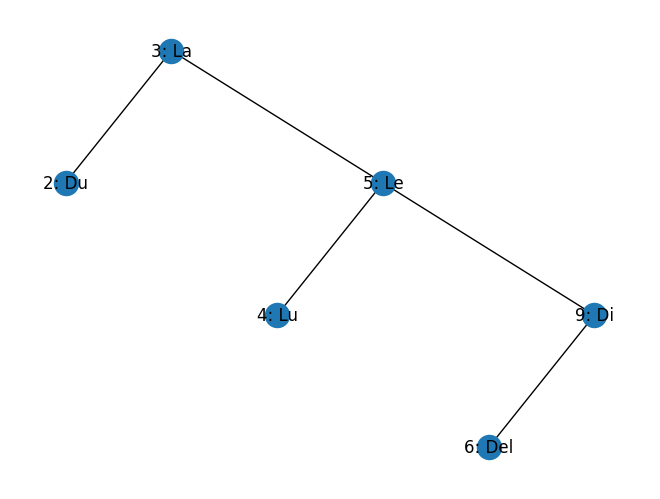

In [83]:
bst.draw()

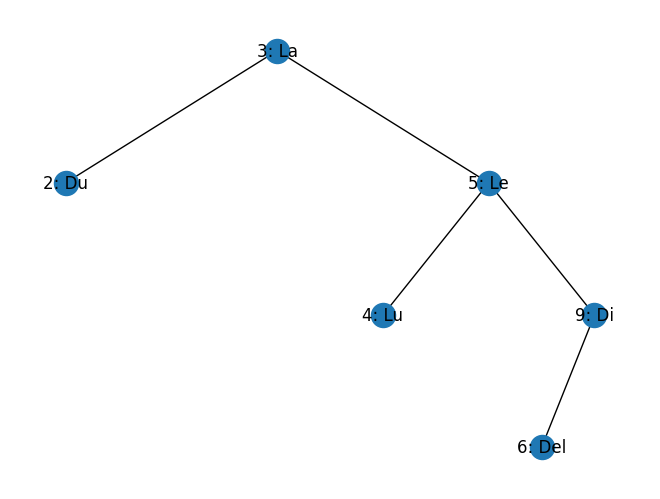

In [79]:
bst.draw()